<a href="https://colab.research.google.com/github/Mahal09/Python/blob/main/Hackathon_Sample_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

## Importing the libraries

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the Training Data and using the Training Data to build the Model

In [2]:
train = pd.read_csv('/content/Train_dataset.csv')
df_train = train.copy()
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [3]:
## Checking for the null values

df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


In [23]:
df_train.duplicated().sum()

0

In [13]:
df_train["Instagram Popularity Quotient"] = df_train["Instagram Popularity Quotient"].fillna(
    value=df_train.groupby(["Hygiene Rating", "Overall Restaurant Rating"])["Instagram Popularity Quotient"].transform("median")
)
df_train["Value Deals Rating"] = df_train["Value Deals Rating"].fillna(
    value=df_train.groupby(["Service", "Staff Responsivness"])["Value Deals Rating"].transform("median")
)

df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


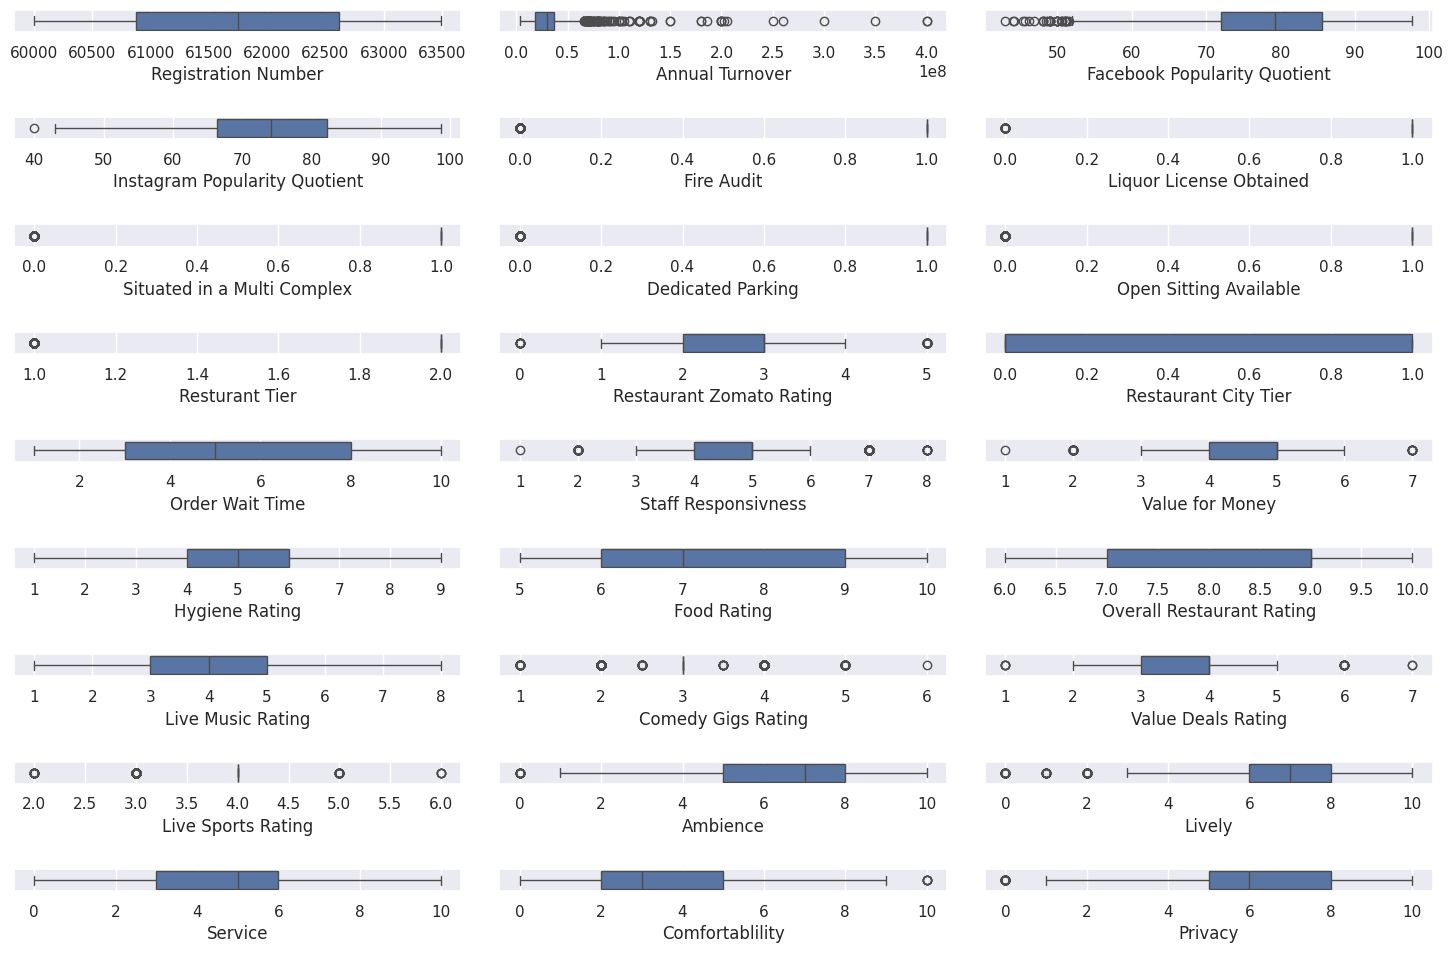

In [17]:
# outlier detection using boxplot
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns needed for the subplots
num_rows = int(np.ceil(len(num_cols) / 3))

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df_train, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [16]:
df_train.head()


,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,3.0,4.0,3.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,4.5,4.0,4.0,4.0,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,3.0,4.0,4.0,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,3.0,4.0,4.0,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,76.0,Tier A Celebrity,76.8,1,...,6.0,4.0,2.0,5.0,4.0,6.0,6,2,4,6


In [60]:
df_train.drop(["Staff Responsivness","Facebook Popularity Quotient","Situated in a Multi Complex"], axis=1, inplace=True)
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Endorsed By,Fire Audit,Liquor License Obtained,Dedicated Parking,Open Sitting Available,...,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Value for Money,Food Rating,Ambience,Lively,Service,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,Not Specific,1,1,0,1,...,Arabian,3,0,2,5,7,8.0,8,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,Tier A Celebrity,1,1,1,0,...,Greek,3,0,6,6,8,5.0,7,7,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,Tier A Celebrity,1,1,1,0,...,90's,3,0,2,5,7,7.0,10,5,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,Tier A Celebrity,0,1,1,1,...,Arabian,3,1,7,5,8,7.0,7,4,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,Tier A Celebrity,1,1,1,1,...,Greek,3,0,10,6,8,6.0,6,2,6


Dat Preparation for modeling

In [61]:
# defining X and y variables
X = df_train.drop(["Annual Turnover"], axis= 1)
y = df_train["Annual Turnover"]

print(X.head())
print(y.head())

   Registration Number           Cuisine       City Restaurant Location  \
0                60001      indian,irish  Bangalore   Near Business Hub   
1                60002      indian,irish     Indore      Near Party Hub   
2                60003   tibetan,italian    Chennai   Near Business Hub   
3                60004  turkish,nigerian    Gurgaon      Near Party Hub   
4                60005     irish,belgian    Manesar      Near Party Hub   

        Endorsed By  Fire Audit  Liquor License Obtained  Dedicated Parking  \
0      Not Specific           1                        1                  0   
1  Tier A Celebrity           1                        1                  1   
2  Tier A Celebrity           1                        1                  1   
3  Tier A Celebrity           0                        1                  1   
4  Tier A Celebrity           1                        1                  1   

   Open Sitting Available  Resturant Tier  ... Restaurant Theme  \
0      

In [64]:
# let's add the intercept to data
X = sm.add_constant(X)

In [63]:
X = pd.get_dummies(X, drop_first=True).astype(float)

In [62]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,Registration Number,Fire Audit,Liquor License Obtained,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Value for Money,...,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,60001,1,1,0,1,2.0,3,0,2,5,...,False,False,False,False,False,False,False,False,False,False
1,60002,1,1,1,0,2.0,3,0,6,6,...,False,False,False,False,False,False,False,False,False,False
2,60003,1,1,1,0,2.0,3,0,2,5,...,False,False,False,False,False,False,False,False,False,False
3,60004,0,1,1,1,1.0,3,1,7,5,...,False,False,False,False,False,False,False,False,False,False
4,60005,1,1,1,1,2.0,3,0,10,6,...,False,False,False,False,False,False,False,False,False,False


In [65]:
X = X.astype(float)
X.head()

,const,Registration Number,Fire Audit,Liquor License Obtained,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,...,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,1.0,60001.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,60002.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,60003.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,60004.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,60005.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2445
Number of rows in test data = 1048


Model Building - Linear Regression

In [68]:
x_train

,const,Registration Number,Fire Audit,Liquor License Obtained,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,...,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
221,1.0,60222.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,1.0,63275.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1329,1.0,61330.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2681,1.0,62682.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,1.0,61157.0,0.0,0.0,1.0,1.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,62764.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,1.0,60906.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,1.0,61097.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,1.0,60236.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Turnover   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2.343
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.31e-27
Time:                        06:00:37   Log-Likelihood:                -44165.
No. Observations:                2445   AIC:                         8.892e+04
Df Residuals:                    2150   BIC:                         9.063e+04
Df Model:                         294                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# Interpretation of the Regression Output

# R-squared:  Indicates the goodness of fit of the model.  A higher R-squared (closer to 1) suggests the model explains a larger proportion of the variance in the dependent variable ("Annual Turnover").  Look at the Adjusted R-squared, which penalizes the inclusion of irrelevant predictors.

# Adj. R-squared: A better measure than R-squared, especially when comparing models with different numbers of predictors.

# F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model.  A low p-value (Prob (F-statistic) < 0.05) suggests that at least one predictor variable is statistically significant in explaining the variation in the dependent variable.


# Coefficients (coef):  These represent the change in the dependent variable ("Annual Turnover") for a one-unit change in the respective independent variable, holding all other variables constant.

# Standard Errors (std err):  Measures the accuracy of the coefficient estimates. Smaller standard errors indicate more precise estimates.

# t-statistic and P>|t|: The t-statistic tests the significance of each individual predictor variable.  A low p-value (P>|t| < 0.05) indicates that the predictor is statistically significant. Variables with high p-values might not be contributing significantly to the model and could be removed.

# Confidence Intervals [0.025 0.975]: The range within which the true population coefficient is likely to fall with 95% confidence.

# Omnibus, Durbin-Watson, Jarque-Bera, Cond. No.: These are diagnostic tests that help assess the validity of the regression assumptions (normality of residuals, independence of errors, homoscedasticity).  Interpreting these tests requires some statistical knowledge; consult statistical resources for a thorough understanding.


# Further Steps:
# 1. Check for multicollinearity:  High multicollinearity (correlation between predictor variables) can inflate standard errors and make it difficult to interpret the coefficients.  Use Variance Inflation Factor (VIF) to check for multicollinearity.
# 2. Remove insignificant variables: Remove variables with high p-values (P>|t| > 0.05) to simplify the model and improve its interpretability.  Re-run the regression after removing each variable.
# 3. Examine Residuals:  Check the distribution of residuals (the difference between the observed and predicted values) for normality and homoscedasticity. Plot residuals against predicted values and create a Q-Q plot to assess these assumptions.
# 4. Consider transformations: If the assumptions of linear regression are violated, consider transformations of the variables (e.g., logarithmic transformation) to improve the model fit.


# Note: The specific interpretation will heavily rely on the context of the data and business objectives.


In [45]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.692766e+07,9.580930e+06,0.242625,0.10751,41.33331


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.548576e+07,1.235983e+07,0.040555,-0.483809,47.058981


In [4]:
## Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

In [5]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI = SimpleImputer(strategy='mean')

In [6]:
## Fitting the Simple Imputer function to get the mean of the variable

SI.fit(df_train[['Instagram Popularity Quotient']])

SimpleImputer()

In [7]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI.transform(df_train[['Instagram Popularity Quotient']])
IPQ

array([[95.8],
       [85. ],
       [68.2],
       ...,
       [86.8],
       [86. ],
       [67. ]])

In [8]:
## Declaring the Linear Regression function

LR = LinearRegression()

In [9]:
## Fitting the Linear Regression function

model = LR.fit(IPQ,df_train['Annual Turnover'])

In [10]:
## Checking the score of the function on the training data

model.score(IPQ,df_train['Annual Turnover'])

0.026482712263984687

In [21]:
df_train['Facebook Popularity Quotient'].mean()

77.9387153800825

In [12]:
df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


# Loading the Test Data and using the Test Data to Predict the target Variable

In [13]:
df_test = pd.read_csv('/content/Test_dataset.csv')
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [14]:
## Checking for the null values

df_test.isnull().sum()

,0
Registration Number,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0


In [15]:
## Using the model built on the Training set to predict on the Test Set

prediction = model.predict(df_test[['Instagram Popularity Quotient']])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([28970960.71768262, 37737095.60304943, 34490378.9788395 ,
       30724187.69475599, 34639727.94355316, 25759957.976339  ,
       23906082.78391513, 27347602.40557766, 31243662.35462957,
       27448250.62092816, 30399516.03233499, 33711166.98902912,
       35139722.30368149, 31081326.52341907, 29078102.36628155,
       27724221.53398601, 33776101.32151332, 27867077.06545124,
       34165707.31641851, 28191748.72787224, 28646289.05526163,
       33516363.99157652, 27996945.73041964, 27996945.73041964,
       31935212.99558628, 26308653.08583048, 36373474.62088126,
       35139722.30368149, 32996889.33170294, 35789065.62852347,
       27120332.24188296, 31243662.35462957, 36146204.45718656,
       36535810.45209175, 31243662.35462957, 22802199.13168375,
       32542349.00431354, 29490435.37755621, 28743690.55398792,
       24360623.11130452, 36730613.44954436, 27802142.73296705,
       29321606.11309729, 27802142.73296705, 35983868.62597607,
       31568334.01705056, 27672274.06799

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [16]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [17]:
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,2.897096e+07
1,20002,3.773710e+07
2,20003,3.449038e+07
3,20004,3.072419e+07
4,20005,3.463973e+07
...,...,...
495,20496,2.994498e+07
496,20497,2.395478e+07
497,20498,2.975017e+07
498,20499,3.770463e+07


In [18]:
## Setting the directory to export the file as a '.csv'

import os
os.chdir('D:/Hackathon')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Hackathon'

In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission.csv',index=False)

# END